In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
csv = '/Users/mollyshallow/Desktop/Wehr_Lab/GLMHMM/data_p97.csv'

In [2]:
data=pd.read_csv(csv)
data

,ID,MusThigmo,CrickThigmo,Crange,Azimuth,MCangle,MusSpeed,CrickSpeed,MusV_1,MusV_2,CrickV_1,CrickV_2,MusVp_1,MusVp_2,CrickVp_1,CrickVp_2
0,0,25.410769,21.005067,16.718904,-1.479955,0.806326,14.424655,107.407599,14.392213,0.966890,-89.818614,58.898294,-2.619761,-14.184764,28.304934,103.610922
1,0,25.336826,21.517596,16.580204,-1.488715,0.773507,15.301040,106.099080,15.143547,2.189708,-88.581886,58.397468,-3.932491,-14.787067,27.049801,102.592997
2,0,25.260104,22.023994,16.458662,-1.495847,0.740658,16.244539,104.612286,15.861402,3.507273,-87.244337,57.724830,-5.340639,-15.341532,25.892510,101.357329
3,0,25.180911,22.523143,16.353319,-1.501183,0.707910,17.249557,102.938976,16.533153,4.919561,-85.799264,56.876349,-6.843331,-15.834015,24.828647,99.899805
4,0,25.099620,23.013946,16.263028,-1.504565,0.675392,18.311999,101.079149,17.147263,6.426559,-84.246321,55.852948,-8.439709,-16.251173,23.855338,98.223812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623188,133,28.159913,29.836635,4.165376,-0.201731,-0.529331,12.703539,14.923030,-1.197631,12.646959,-3.332708,14.546130,-12.446458,-2.542751,-14.909630,0.632280
623189,133,28.146236,29.837547,4.175706,-0.208455,-0.527344,12.956495,16.301181,-1.062439,12.912862,-3.121268,15.999568,-12.667527,-2.721128,-16.299897,0.204616
623190,133,28.131586,29.835671,4.191857,-0.214906,-0.524336,13.246973,17.775996,-0.920034,13.214985,-2.788413,17.555934,-12.922216,-2.915240,-17.772575,-0.348733
623191,133,28.115905,29.830363,4.213976,-0.220911,-0.520140,13.572061,19.349516,-0.773602,13.549995,-2.328384,19.208914,-13.208399,-3.120743,-19.322068,-1.030272


In [3]:
mus_spd=data['MusSpeed'].to_numpy()
az=data['Azimuth'].to_numpy()
approach=[]
paired=list(zip(az,  mus_spd))
for pair in paired:
    if np.abs(pair[0])<0.5 and pair[1]>5:
        approach.append(1)
    else:
        approach.append(0)

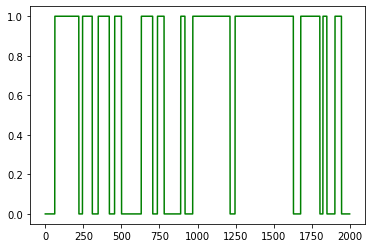

In [4]:
plt.plot(approach[0:2000], color='g')
# plt.plot(data['ID'][0:2000], color='r')

In [5]:
data['State']=approach

In [6]:
data

,ID,MusThigmo,CrickThigmo,Crange,Azimuth,MCangle,MusSpeed,CrickSpeed,MusV_1,MusV_2,CrickV_1,CrickV_2,MusVp_1,MusVp_2,CrickVp_1,CrickVp_2,State
0,0,25.410769,21.005067,16.718904,-1.479955,0.806326,14.424655,107.407599,14.392213,0.966890,-89.818614,58.898294,-2.619761,-14.184764,28.304934,103.610922,0
1,0,25.336826,21.517596,16.580204,-1.488715,0.773507,15.301040,106.099080,15.143547,2.189708,-88.581886,58.397468,-3.932491,-14.787067,27.049801,102.592997,0
2,0,25.260104,22.023994,16.458662,-1.495847,0.740658,16.244539,104.612286,15.861402,3.507273,-87.244337,57.724830,-5.340639,-15.341532,25.892510,101.357329,0
3,0,25.180911,22.523143,16.353319,-1.501183,0.707910,17.249557,102.938976,16.533153,4.919561,-85.799264,56.876349,-6.843331,-15.834015,24.828647,99.899805,0
4,0,25.099620,23.013946,16.263028,-1.504565,0.675392,18.311999,101.079149,17.147263,6.426559,-84.246321,55.852948,-8.439709,-16.251173,23.855338,98.223812,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623188,133,28.159913,29.836635,4.165376,-0.201731,-0.529331,12.703539,14.923030,-1.197631,12.646959,-3.332708,14.546130,-12.446458,-2.542751,-14.909630,0.632280,1
623189,133,28.146236,29.837547,4.175706,-0.208455,-0.527344,12.956495,16.301181,-1.062439,12.912862,-3.121268,15.999568,-12.667527,-2.721128,-16.299897,0.204616,1
623190,133,28.131586,29.835671,4.191857,-0.214906,-0.524336,13.246973,17.775996,-0.920034,13.214985,-2.788413,17.555934,-12.922216,-2.915240,-17.772575,-0.348733,1
623191,133,28.115905,29.830363,4.213976,-0.220911,-0.520140,13.572061,19.349516,-0.773602,13.549995,-2.328384,19.208914,-13.208399,-3.120743,-19.322068,-1.030272,1


In [7]:
data.to_csv('segmented_data1.csv')